# Sampling Method

Inspired by [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers) by Jake VanderPlas

Let's say you have 2 sets of test scores:  
    
    84, 72, 57, 46, 63, 76, 99, 91 
    
and  
    
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69  
    
The mean of the first set of test scores is 73.5 and the mean of the second set of test scores is 66.9.  
The difference between the 2 means is 6.58.

Is this difference statistically significant?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np    # library to allow us to use vectorized datastructures
import matplotlib.pyplot as plt

test1 = [
    84, 72, 57, 46, 63, 76, 99, 91
]

test2 = [
    81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69
]

test_scores1 = np.array(test1)
test_scores2 = np.array(test2)

### Test score set 1 mean:

In [2]:
test_scores1.mean()

73.5

### Test score set 2 mean:

In [3]:
test_scores2.mean()

66.916666666666671

In [4]:
diff = test_scores1.mean() - test_scores2.mean()
diff

6.5833333333333286

### Is the difference in the means statistically significant?

In [5]:
combined = np.concatenate((test_scores1, test_scores2))

In [6]:
combined

array([84, 72, 57, 46, 63, 76, 99, 91, 81, 69, 74, 61, 56, 87, 69, 65, 66,
       44, 62, 69])

In [7]:
diff_means = np.array([])

In [9]:
for i in range(10000):
    diff_means = np.append(diff_means, np.random.choice(combined, size=len(test_scores1), replace=True).mean()
                           - np.random.choice(combined, size=len(test_scores2), replace=True).mean()
                          )

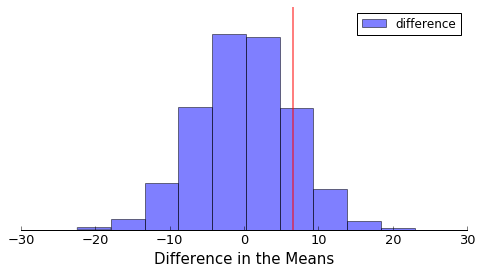

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.hist(diff_means, alpha=.5, label='difference')
plt.legend(loc='best')
plt.xlabel('Difference in the Means', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.axvline(6.58, linewidth=2, alpha=0.5, color='red')
plt.show()

In [30]:
gt_diff = diff_means[diff_means >= diff]
p = len(gt_diff) / 10000
print('Out of 10,000 samples, the probability that the difference in the means is at least ' + 
      "{0:.2f}".format(diff) + ' is ' + str(p))

Out of 10,000 samples, the probability that the difference in the means is at least 6.58 is 0.1543


Since the probability is > 0.05, the difference is not significant